In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/shifting-seas-ocean-climate-and-marine-life-dataset/realistic_ocean_climate_dataset.csv


In [2]:
df =pd.read_csv("/kaggle/input/shifting-seas-ocean-climate-and-marine-life-dataset/realistic_ocean_climate_dataset.csv")
df.head()

,Date,Location,Latitude,Longitude,SST (°C),pH Level,Bleaching Severity,Species Observed,Marine Heatwave
0,2015-01-01,Red Sea,20.0248,38.4931,29.47,8.107,NaN,106,False
1,2015-01-07,Great Barrier Reef,-18.2988,147.7782,29.65,8.004,High,116,False
2,2015-01-14,Caribbean Sea,14.9768,-75.0233,28.86,7.947,High,90,False
3,2015-01-20,Great Barrier Reef,-18.3152,147.6486,28.97,7.995,Medium,94,False
4,2015-01-27,Galápagos,-0.8805,-90.9769,28.60,7.977,NaN,110,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                500 non-null    object 
 1   Location            500 non-null    object 
 2   Latitude            500 non-null    float64
 3   Longitude           500 non-null    float64
 4   SST (°C)            500 non-null    float64
 5   pH Level            500 non-null    float64
 6   Bleaching Severity  350 non-null    object 
 7   Species Observed    500 non-null    int64  
 8   Marine Heatwave     500 non-null    bool   
dtypes: bool(1), float64(4), int64(1), object(3)
memory usage: 31.9+ KB


In [4]:
df.shape

(500, 9)

In [5]:
df.describe()

,Latitude,Longitude,SST (°C),pH Level,Species Observed
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,6.728440,11.930638,28.537200,8.049872,120.472000
std,13.534648,108.174778,1.425076,0.055707,20.475441
min,-18.383000,-155.717600,23.640000,7.872000,54.000000
25%,-0.932925,-90.926400,27.530000,8.011000,107.750000
50%,10.018750,38.520000,28.515000,8.052000,120.000000
75%,19.891000,114.990975,29.452500,8.085250,133.250000
max,20.122000,147.827100,33.210000,8.195000,171.000000


In [6]:
df.isnull().sum()

Date                    0
Location                0
Latitude                0
Longitude               0
SST (°C)                0
pH Level                0
Bleaching Severity    150
Species Observed        0
Marine Heatwave         0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df['Bleaching Severity'].unique()

array([nan, 'High', 'Medium', 'Low'], dtype=object)

In [9]:
df['Bleaching Severity'].fillna("Unknown", inplace=True)
df.isnull().sum()

/tmp/ipykernel_13/4292518239.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Bleaching Severity'].fillna("Unknown", inplace=True)


Date                  0
Location              0
Latitude              0
Longitude             0
SST (°C)              0
pH Level              0
Bleaching Severity    0
Species Observed      0
Marine Heatwave       0
dtype: int64

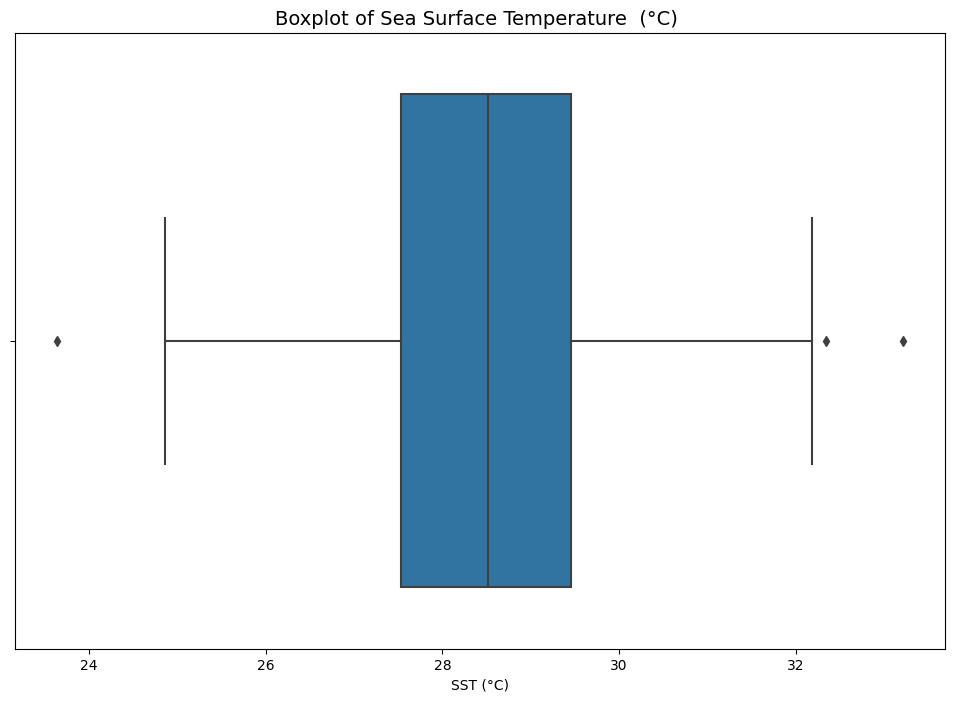

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.boxplot(x=df["SST (°C)"])
plt.title("Boxplot of Sea Surface Temperature  (°C) ", fontsize=14)
plt.xlabel("SST (°C)")
plt.show()

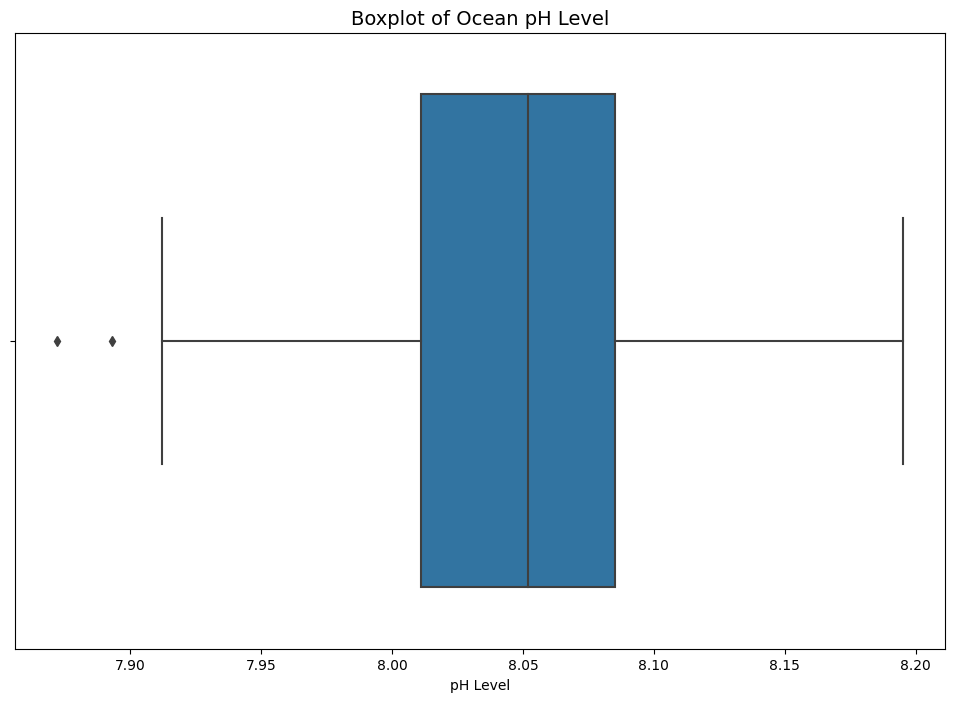

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df['pH Level'])
plt.title("Boxplot of Ocean pH Level", fontsize=14)
plt.xlabel("pH Level")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


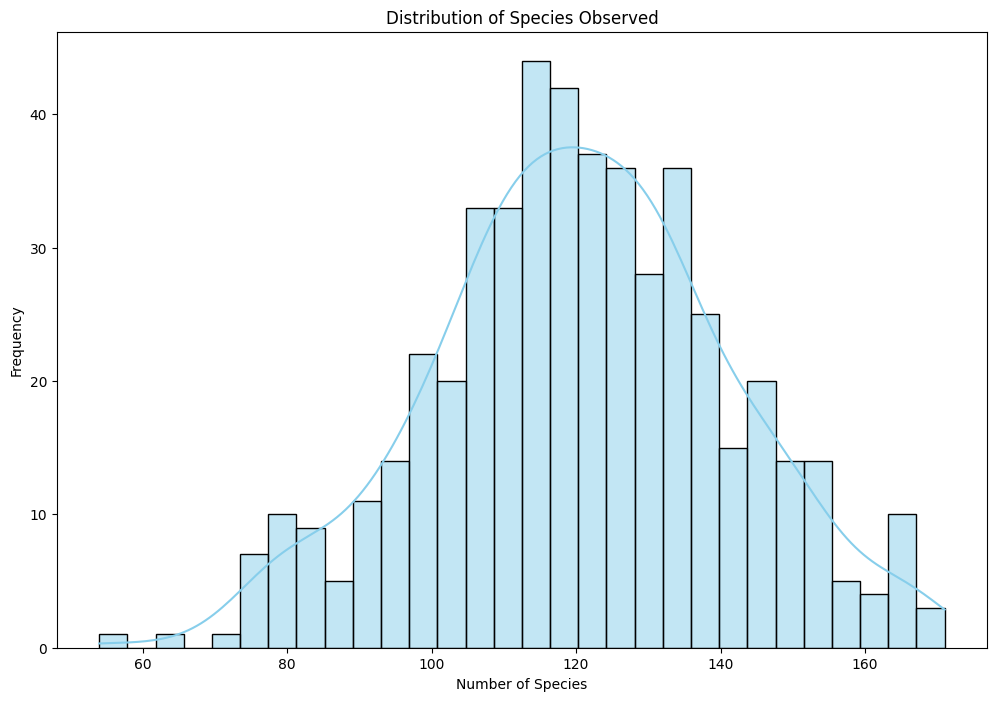

In [12]:
plt.figure(figsize=(12,8))
sns.histplot(df['Species Observed'], bins=30, kde=True, color='skyblue')
plt.title("Distribution of Species Observed")
plt.xlabel("Number of Species")
plt.ylabel("Frequency")
plt.show()

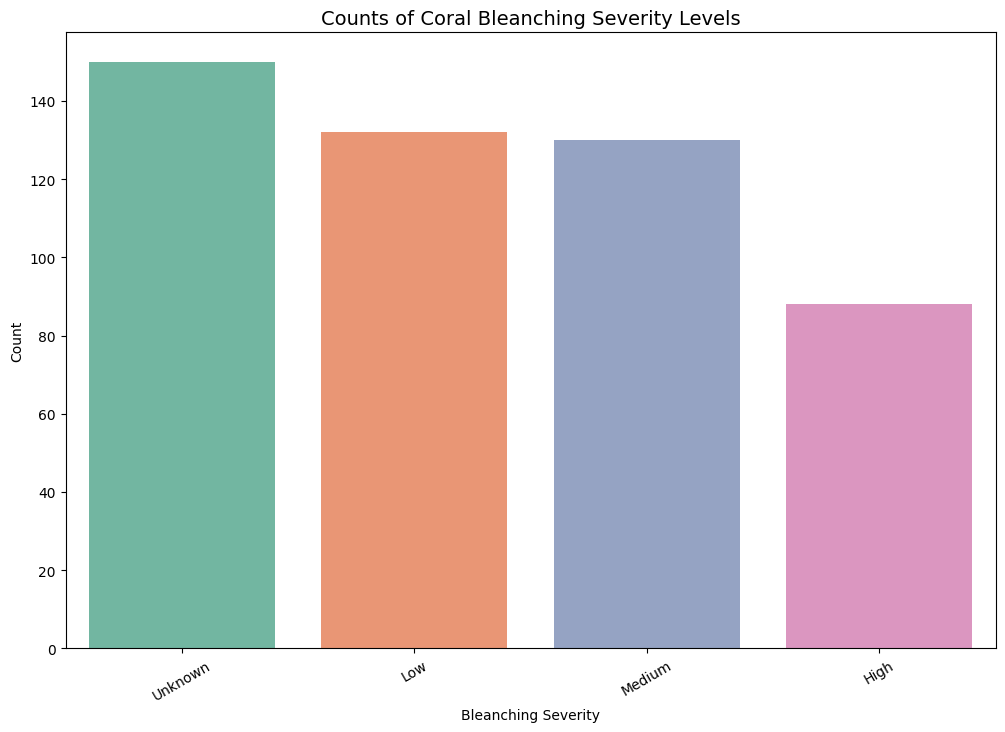

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(data=df, x='Bleaching Severity', order=df['Bleaching Severity'].value_counts().index, palette="Set2")
plt.title("Counts of Coral Bleanching Severity Levels", fontsize=14)
plt.xlabel("Bleanching Severity")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.show()

In [14]:
Q1 = df['SST (°C)'].quantile(0.25)
Q3 = df['SST (°C)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['SST (°C)'] >= lower_bound) & (df['SST (°C)'] <= upper_bound)]

print("Original dataset size:", df.shape)
print("After removing SST outliers:", df_no_outliers.shape)

Original dataset size: (500, 9)
After removing SST outliers: (497, 9)


/tmp/ipykernel_13/2878311205.py:22: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


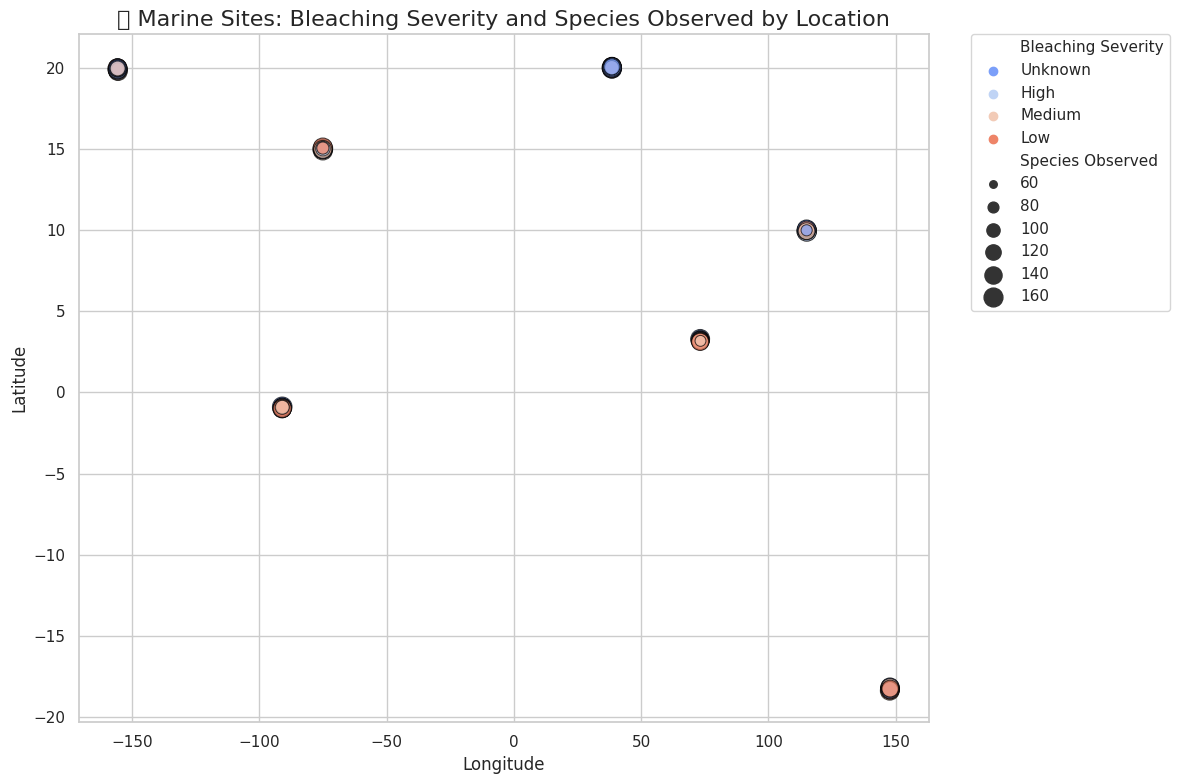

In [15]:
sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df,
    x="Longitude",
    y="Latitude",
    hue="Bleaching Severity",            
    size="Species Observed",              
    palette="coolwarm",                  
    sizes=(20, 200),                      
    alpha=0.7,                            
    edgecolor="black"                     
)


plt.title("🌊 Marine Sites: Bleaching Severity and Species Observed by Location", fontsize=16)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.grid(True)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, mean_squared_error, r2_score

df = df.copy()

le = LabelEncoder()
df['Bleaching Encoded'] = le.fit_transform(df['Bleaching Severity'])


In [17]:
# Classification

X_clf = df[['SST (°C)', 'pH Level', 'Species Observed', 'Bleaching Encoded', 'Latitude', 'Longitude']]
y_clf = df['Marine Heatwave']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_clf, y_clf, test_size=0.2, random_state=42)


clf_model = RandomForestClassifier(random_state=42)
clf_model.fit(X_train_c, y_train_c)

y_pred_c = clf_model.predict(X_test_c)
print("Classification Report - Marine Heatwave:")
print(classification_report(y_test_c, y_pred_c))

Classification Report - Marine Heatwave:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        81
        True       1.00      1.00      1.00        19

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [18]:
# Regression

X_reg = df[['SST (°C)', 'pH Level', 'Bleaching Encoded', 'Latitude', 'Longitude']]
y_reg = df['Species Observed']

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

In [19]:
reg_model = RandomForestRegressor(random_state=42)
reg_model.fit(X_train_r, y_train_r)

y_pred_r = reg_model.predict(X_test_r)
print("Regression Report - Species Observed:")
print("MSE:", mean_squared_error(y_test_r, y_pred_r))
print("R2 Score:", r2_score(y_test_r, y_pred_r))

Regression Report - Species Observed:
MSE: 236.95921299999998
R2 Score: 0.5108670949896532


In [20]:
from sklearn.model_selection import  GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_c, y_train_c)


best_model = grid_search.best_estimator_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [21]:
y_pred = best_model.predict(X_test_c)
mse = mean_squared_error(y_test_c, y_pred)
r2 = r2_score(y_test_c, y_pred)

print("Best Parameters:", grid_search.best_params_)
print("MSE:", mse)
print("R² Score:", r2)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
MSE: 0.0
R² Score: 1.0


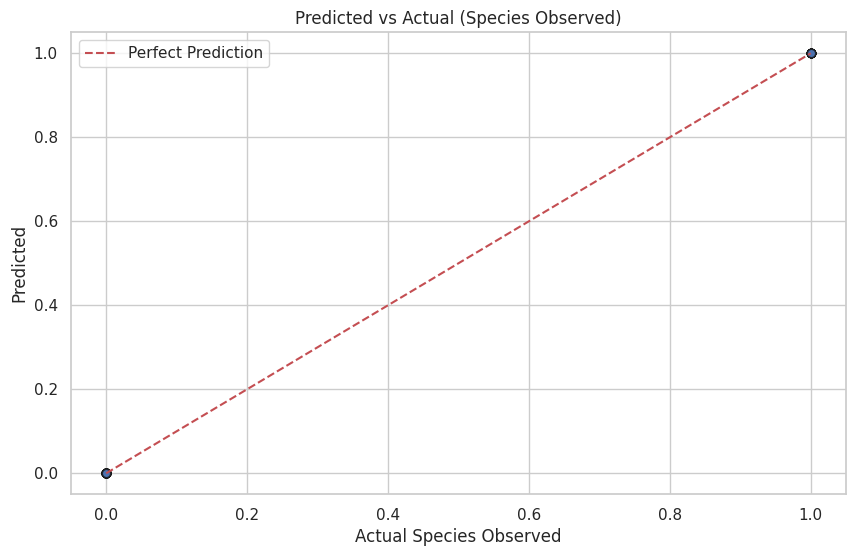

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


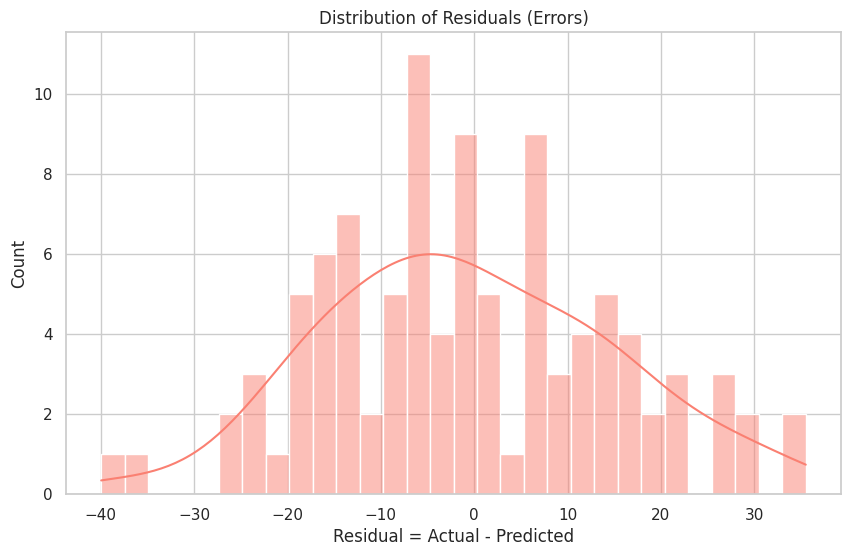

In [22]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test_c, y_pred_c, alpha=0.7, edgecolor='k')
plt.plot([y_test_c.min(), y_test_c.max()], [y_test_c.min(), y_test_c.max()], '--r', label='Perfect Prediction')
plt.xlabel("Actual Species Observed")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (Species Observed)")
plt.legend()
plt.grid(True)
plt.show()


residuals = y_test_r - y_pred_r
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True, color="salmon")
plt.title("Distribution of Residuals (Errors)")
plt.xlabel("Residual = Actual - Predicted")
plt.grid(True)
plt.show()


In [23]:
df.to_csv("ocen climate and marine.csv")